<a href="https://colab.research.google.com/github/deborahgh/LING486/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Part 1: Cleaning the Text, Segmenting them and Tokenizing them
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import string                
import tensorflow as tf     
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

rawText = open('/content/drive/MyDrive/LING486_Midterm/pride_and_prejudice_cleaned.txt', 'r')
text = str(rawText.read())
text = text.replace('_' , '')
text = text.replace('Mr. ' , 'Mr') 
text = text.replace('Mrs. ' , 'Mrs')
text = text.replace('\n' , ' ')
text = text.replace('      ' , '')
punct = string.punctuation
for p in punct:
  text = text.replace(p, ".")
phrases = []
phrases = text.split(".")
for phrase in phrases:
  if phrase == '  ':
    phrases.remove('  ')
  if phrase == '':
    phrases.remove('')
  if phrase == ' ':
    phrases.remove(' ')

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)
word_dict = []
for i in word_index:
  word_dict.append(i)

gather = []
from keras.utils import to_categorical #for OHE
from itertools import compress #for getting pairs
for test in sequences:
  res = list(zip(test, test[1:] + test[:1]))
  res = res[:-1]  #gets rid of last element b/c it's last word loop to first word (ie. 1st line: (4, 3))
  gather.append(res)

IN, OUT = [], []
for gat in gather:
  for g in gat:
    IN.append(g[0])
    OUT.append(g[1])

OHEencoded = to_categorical(IN)

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

bottleneck = 9 

input = Input(shape=(6956,))
encoded = Dense(128, activation='relu')(input)
encoded = keras.layers.LeakyReLU()(encoded)
encoded = Dense(bottleneck, activation='relu')(input)
encoded = keras.layers.LeakyReLU()(encoded)
decoded = Dense(6956, activation='sigmoid')(encoded)

autoencoder = Model(input, decoded)

encoder = Model(input, encoded)
encoded_input = Input(shape=(bottleneck,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

training_data, training_labels = [], []
test_data, test_labels = [], []
for i in range(len(OHEencoded)):
  if i % 4 == 1:
    test_data.append(OHEencoded[i])
    test_labels.append(OUT[i])
  else:
    training_data.append(OHEencoded[i])
    training_labels.append(OUT[i])

training_data = np.array(training_data)
training_labels = np.array(training_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels) 

autoencoder.fit(training_data, training_labels, epochs=50, batch_size=256, shuffle=True, validation_data=(test_data, test_labels), verbose=1)

NameError: ignored

Prediction: beaux 5011 [1.3210161  1.0735624  1.1210649  0.97540474 1.4883728  1.0143464
 1.3286706  1.2107638  0.91772044] Adverb


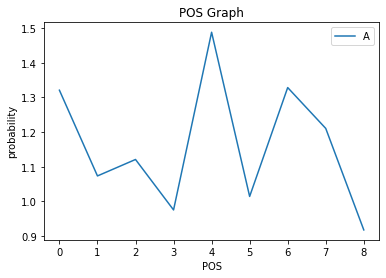

Prediction: for 21 [1.0739973  0.07880694 0.5937427  1.5955806  0.99308205 1.8695686
 1.0297583  1.7823586  0.40042937] Adjective


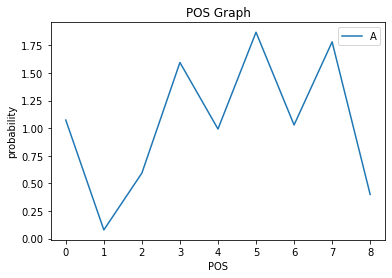

Prediction: of 3 [2.2854428  0.         0.         1.6733394  0.         0.7620901
 0.09990907 2.6152787  0.6353265 ] Preposition


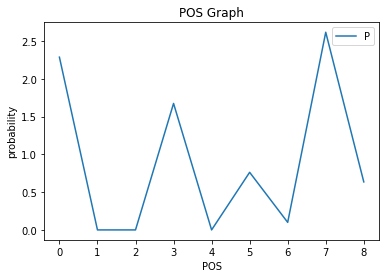

Prediction: in 8 [1.5905812  0.         0.         1.7718389  0.         0.46571785
 1.7206991  2.6479397  0.04186356] Preposition


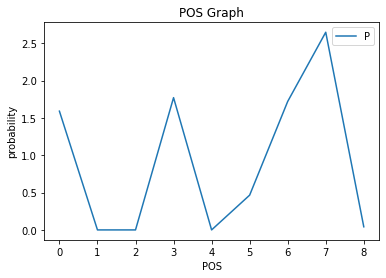

Prediction: child 952 [0.7049353  1.667475   1.6635509  1.7942963  2.262671   1.8171852
 0.93650496 1.8591807  1.2873089 ] Adverb


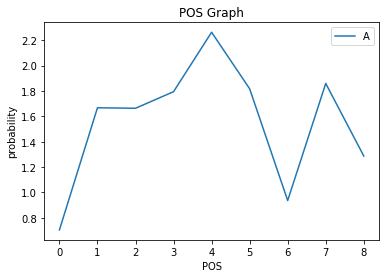

Prediction: official 3111 [1.8144143  0.27963537 1.548743   0.25033867 0.71717334 0.30490148
 0.6012385  1.9927893  1.7294977 ] Preposition


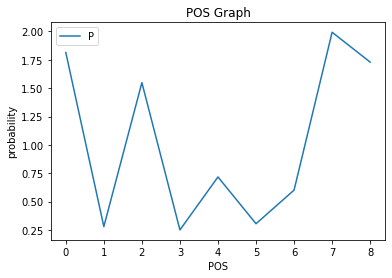

Prediction: who 65 [1.2706519  1.226118   1.3595572  1.9672875  2.2508585  0.03902584
 0.         0.11122096 0.49764946] Adverb


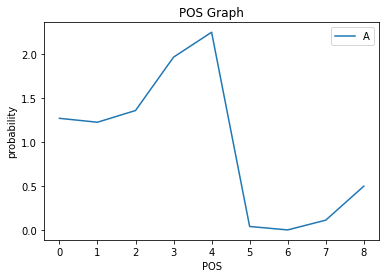

Prediction: beauty 545 [1.0967568 1.6568747 2.1142693 1.2618865 2.1883998 1.8140113 1.8971753
 1.5984112 1.1793842] Adverb


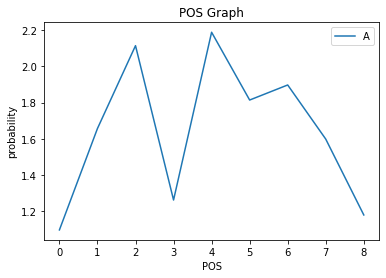

Prediction: passed 271 [2.522676   1.1441247  0.21144903 1.0875442  1.8182234  1.3514547
 2.0222273  0.8232697  0.37297797] Determiner


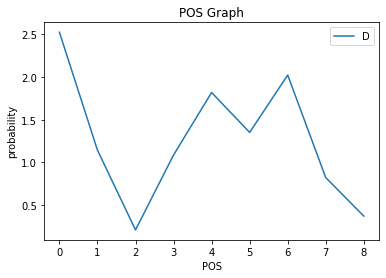

Prediction: question 724 [2.8748815  0.765607   1.4877427  1.9433681  1.7463484  0.5699631
 1.9625672  1.5976261  0.30666327] Determiner


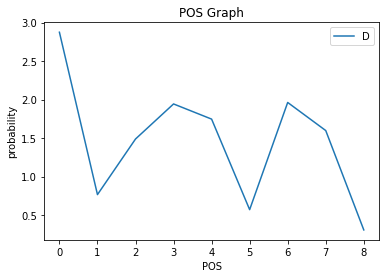

Prediction: i 6 [0.        2.8948662 2.5325875 1.6459327 2.2032764 0.        0.
 1.4688565 0.       ] Noun


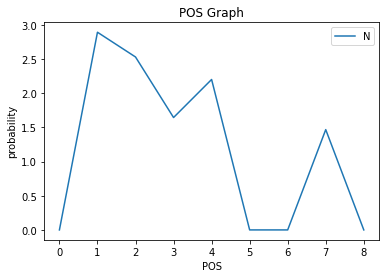

Prediction: most 96 [0.         0.         0.88067436 0.87814635 0.         0.
 2.080492   0.         0.        ] Conjunction


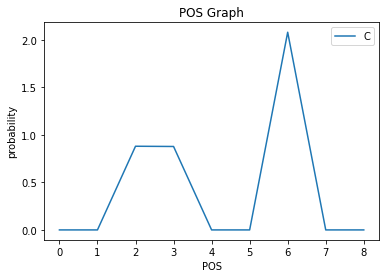

Prediction: sadly 3811 [1.3275806  1.0698733  1.1466587  0.9609566  1.4638686  1.0109537
 1.3421383  1.2205845  0.90508944] Adverb


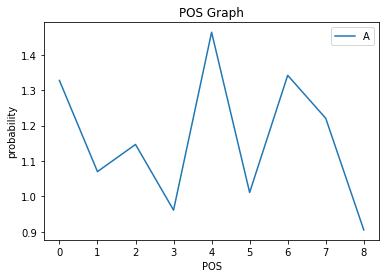

Prediction: were 35 [0.82638717 1.2868183  0.92181194 0.980586   0.45348048 2.1956587
 1.3405025  0.         0.5869859 ] Adjective


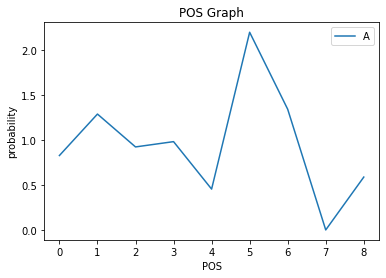

Prediction: day 116 [1.7323759  1.3482928  1.5687051  0.8392695  2.5778346  1.4524293
 1.1808622  0.88090456 0.78350896] Adverb


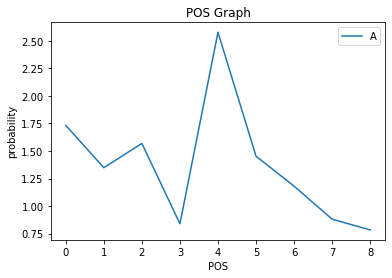

Prediction: a 7 [0.         0.         1.827835   0.         0.         0.
 2.0106745  0.55907977 3.341385  ] Injection


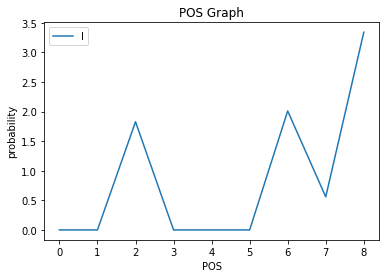

Prediction: the 1 [0.         0.         0.         0.         0.         0.10859662
 0.         1.2130139  4.812643  ] Injection


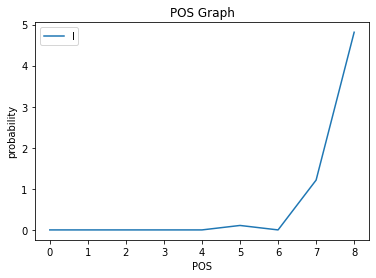

Prediction: her 5 [0.        2.232462  0.        0.5653163 1.1171572 0.        1.6901792
 1.9714468 1.2221781] Noun


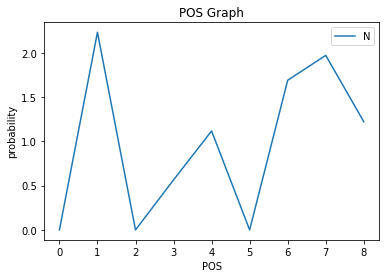

Prediction: caution 2753 [1.104867   1.8293378  0.71903074 0.543679   2.2585998  1.8521645
 2.0760398  1.2630389  1.6875601 ] Adverb


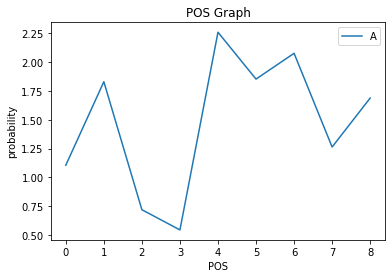

Prediction: chapter 137 [0. 0. 0. 0. 0. 0. 0. 0. 0.] Determiner


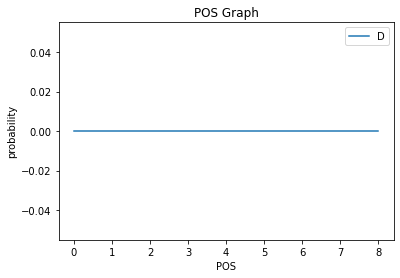

Prediction: had 19 [0.957306   2.4009843  0.         2.3439116  0.20379996 2.347336
 0.         0.         1.0173753 ] Noun


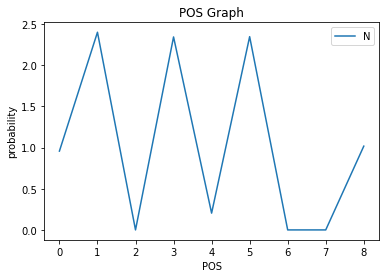

Prediction: tempt 2168 [2.4073782  0.24569577 2.353211   1.192855   0.6922653  1.8274422
 2.0908737  2.222072   0.41080683] Determiner


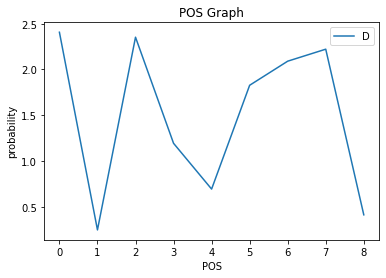

Prediction: in 8 [1.5905812  0.         0.         1.7718389  0.         0.46571785
 1.7206991  2.6479397  0.04186356] Preposition


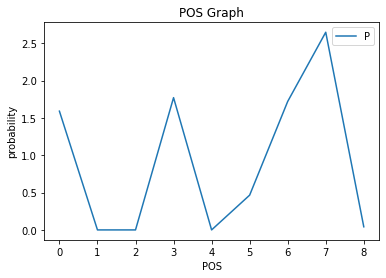

Prediction: conveyed 3485 [1.5160836  0.55728817 0.6969025  1.8155074  0.9581679  1.795489
 2.1068888  2.0117555  1.6263223 ] Conjunction


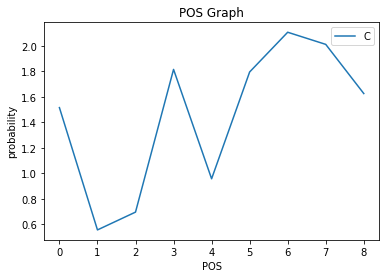

Prediction: conviction 862 [2.9426794  2.2541864  2.2192004  2.098172   2.6478512  1.4109936
 1.5266362  2.3551946  0.67253804] Determiner


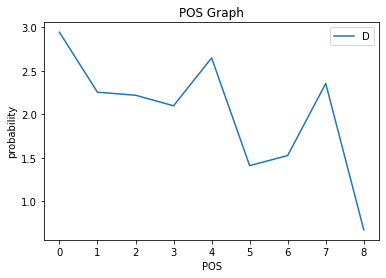

Prediction: few 220 [2.4363601e-01 0.0000000e+00 1.3797979e+00 0.0000000e+00 2.3068361e+00
 6.2199485e-01 1.6807770e+00 1.0269926e+00 5.0675869e-04] Adverb


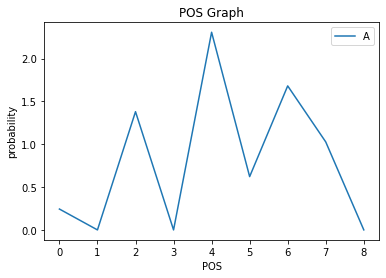

Prediction: from 39 [1.3471828  0.         0.73895097 1.9554567  0.         1.4327308
 0.5660671  2.193163   0.2885751 ] Preposition


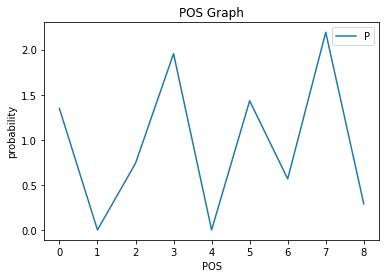

Prediction: reasonable 912 [1.6940467  0.8918294  1.1515195  0.5997448  1.4947273  0.61248916
 1.9488717  1.304967   1.3283558 ] Conjunction


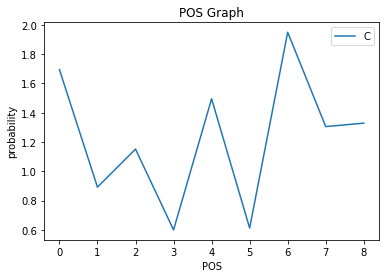

Prediction: she 10 [0.64604926 2.0850902  0.5900669  1.3495516  2.9732082  0.
 0.         0.00485551 0.        ] Adverb


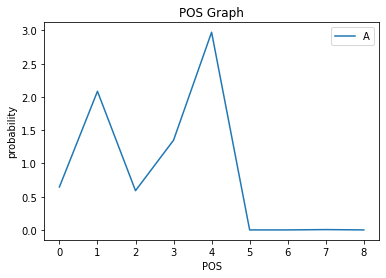

Prediction: of 3 [2.2854428  0.         0.         1.6733394  0.         0.7620901
 0.09990907 2.6152787  0.6353265 ] Preposition


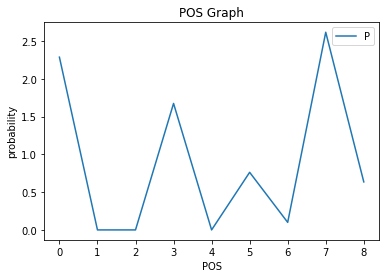

In [ ]:
import matplotlib.pyplot as plt
from numpy import argmax
from random import randrange

class_names = ['Determiner', 'Noun', 'Pronoun', 'Verb', 'Adverb', 'Adjective', 'Conjunction', 'Preposition', 'Injection']

encoded_result = encoder.predict(test_data)
decoded_result = decoder.predict(encoded_result)
prediction = encoded_result
#prediction = decoded_result

for i in range(30):
  rand = randrange(26607)
  inverted = argmax(test_data[rand]) 
  word = word_dict[inverted - 1] 
  print("Prediction: " + word + " " + str(inverted) + " " + str(prediction[rand]) + " " + class_names[(np.argmax(prediction[rand]))%9]) 
  plt.plot(prediction[rand]) 
  plt.title('POS Graph')
  plt.ylabel('probability') 
  plt.xlabel('POS')  
  name = class_names[(np.argmax(prediction[rand]))%9]
  plt.legend(name, loc='best')
  plt.show()